In [4]:
import os
import sys
import csv
import time
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from scipy.stats import chi2, norm
from scipy.integrate import quad
from scipy.special import erfinv

from sklearn.metrics.pairwise import pairwise_distances

import torch
import falkon

sys.path.insert(0, "../notebooks")
from plot_utils import plot_one_t, plot_two_t, plot_ref_data


In [5]:
# Plotting parameters
FONTSIZE  = 24
FIGSIZE   = (10, 8)
RATIOSIZE = (10, 10)
PALETTE_1 = [
    "#1f77b4", # 0
    "#4876bf", # 1 
    "#6c74c5", # 2
    "#8f6fc6", # 3
    "#b067c0", # 4
    "#cd5fb4", # 5
    "#e657a3", # 6
    "#f9528d", # 7
    "#ff5474", # 8
    "#ff5d58", # 9
    "#ff6c3a", # 10
    "#ff7f0e", # 11
]
PALETTE_2 = [
    "#494B69", # 0
    "#695D7A", # 1
    "#9F5B72", # 2
    "#D8707C", # 3
    "#FDA85A", # 4
    "#FDCD5A", # 5
]
PALETTE_3 = [
    "midnightblue",   # 0
    "#1f78b4",        # 1
    "lightseagreen",  # 2
    "mediumseagreen", # 3
    "darkseagreen",   # 4
]

In [2]:
DATA_PATH = '../data/creditcard.csv'
df = pd.read_csv(DATA_PATH)

#normalize Time and Amount features
df['Time']   = (df['Time'] - df['Time'].mean()) / df['Time'].std()
df['Amount'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

df_ref  = df[df['Class']==0]
df_data = df[df['Class']==1]

N_REF_TOT  = len(df_ref)
N_DATA_TOT = len(df_data)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996580,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996580,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342474,0
2,-1.996558,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160684,0
3,-1.996558,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996537,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


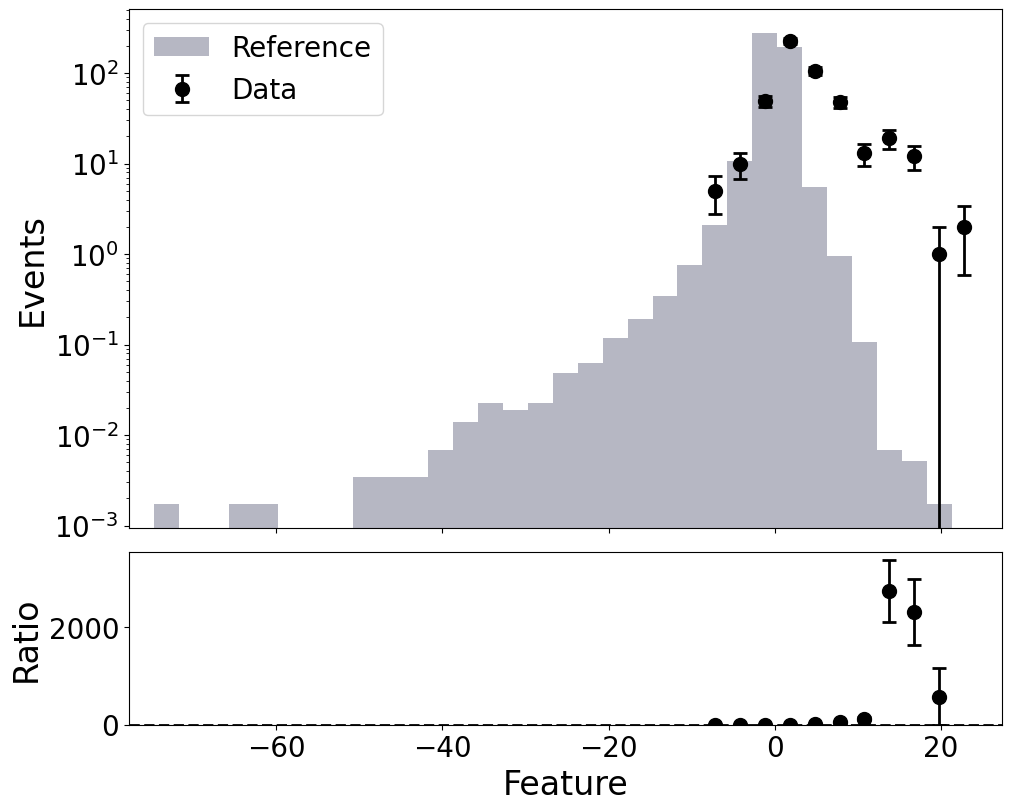

In [16]:
plot_ref_data(
    feature_ref   = torch.Tensor(df_ref['V2'].to_numpy()),
    feature_data  = torch.Tensor(df_data['V2'].to_numpy()),
    weights_ref   = np.ones(len(df_ref))*(len(df_data)/len(df_ref)),
    weights_data  = np.ones(len(df_data)),
    figsize       = FIGSIZE,
    bins          = np.arange(min(df_ref['V2'])-5, max(df_ref['V2'])+10, 3),
    ratio         = True,
    fontsize      = FONTSIZE,
    cms           = False,
    color_ref     = PALETTE_2[0],
    color_data    = "black",
    ref_hist_type = "stepfilled",
    ref_label     = "Reference",
    data_label    = "Data",
    ref_alpha     = 0.4,
    xlabel        = "Feature",
    ylabel        = "Events",
    ratio_ylabel  = "Ratio",
    hist_yscale   = "log",
    ratio_yscale  = "linear",
    show_plot     = True,
    save_plot     = False,
    return_fig    = False
)